# IMPORTING THE LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

# ACCESSING THE DATASET

In [2]:
df=pd.read_csv(r'C:\Users\tejith\Downloads\Python-Projects-The-Discovery-of-Handwashing\Data\yearly_deaths_by_clinic.csv')

In [3]:
df.head()

,year,births,deaths,clinic
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1
3,1844,3157,260,clinic 1
4,1845,3492,241,clinic 1


In [4]:
df.tail()

,year,births,deaths,clinic
7,1842,2659,202,clinic 2
8,1843,2739,164,clinic 2
9,1844,2956,68,clinic 2
10,1845,3241,66,clinic 2
11,1846,3754,105,clinic 2


In [5]:
df.shape

(12, 4)

In [8]:
df.describe()

,year,births,deaths
count,12.000000,12.000000,12.000000
mean,1843.500000,3152.750000,223.333333
std,1.783765,449.078476,145.383089
min,1841.000000,2442.000000,66.000000
25%,1842.000000,2901.750000,100.250000
50%,1843.500000,3108.500000,219.500000
75%,1845.000000,3338.250000,263.500000
max,1846.000000,4010.000000,518.000000


# INSPECTING THE DATASET

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    12 non-null     int64 
 1   births  12 non-null     int64 
 2   deaths  12 non-null     int64 
 3   clinic  12 non-null     object
dtypes: int64(3), object(1)
memory usage: 516.0+ bytes


In [10]:
df.dtypes

year       int64
births     int64
deaths     int64
clinic    object
dtype: object

# Checking the missing data

In [11]:
df.isnull().sum()

year      0
births    0
deaths    0
clinic    0
dtype: int64

In [12]:
df.isnull().any()

year      False
births    False
deaths    False
clinic    False
dtype: bool

In [13]:
df['prop_death']=df['deaths']/df['births']

In [14]:
df1=df.iloc[0:6]
df2=df.iloc[6:12]
print(df1)

   year  births  deaths    clinic  prop_death
0  1841    3036     237  clinic 1    0.078063
1  1842    3287     518  clinic 1    0.157591
2  1843    3060     274  clinic 1    0.089542
3  1844    3157     260  clinic 1    0.082357
4  1845    3492     241  clinic 1    0.069015
5  1846    4010     459  clinic 1    0.114464


# PLOTTING THE DATA

<Axes: xlabel='year'>

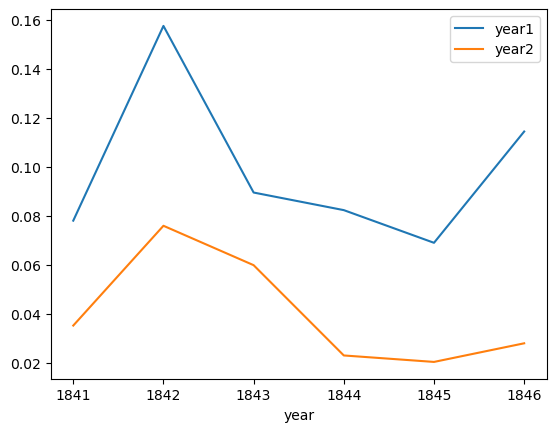

In [16]:
ax=df1.plot(x='year',y='prop_death',label='year1')
df2.plot(x='year',y='prop_death',label='year2', ax=ax)

# ACCESSING THE MONTHLY DATASET

In [17]:
mon=pd.read_csv(r'C:\Users\tejith\Downloads\Python-Projects-The-Discovery-of-Handwashing\Data\monthly_deaths.csv')

In [18]:
mon.head()

,date,births,deaths
0,1841-01-01,254,37
1,1841-02-01,239,18
2,1841-03-01,277,12
3,1841-04-01,255,4
4,1841-05-01,255,2


In [19]:
mon['prop_death']=mon['deaths']/mon['births']

In [20]:
mon.head()

,date,births,deaths,prop_death
0,1841-01-01,254,37,0.145669
1,1841-02-01,239,18,0.075314
2,1841-03-01,277,12,0.043321
3,1841-04-01,255,4,0.015686
4,1841-05-01,255,2,0.007843


# PLOTTING THE DATA

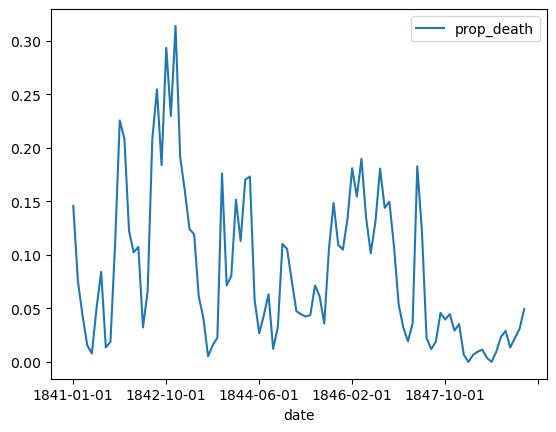

In [22]:
ax=mon.plot(x='date',y='prop_death')

Text(0, 0.5, 'Number of Deaths')

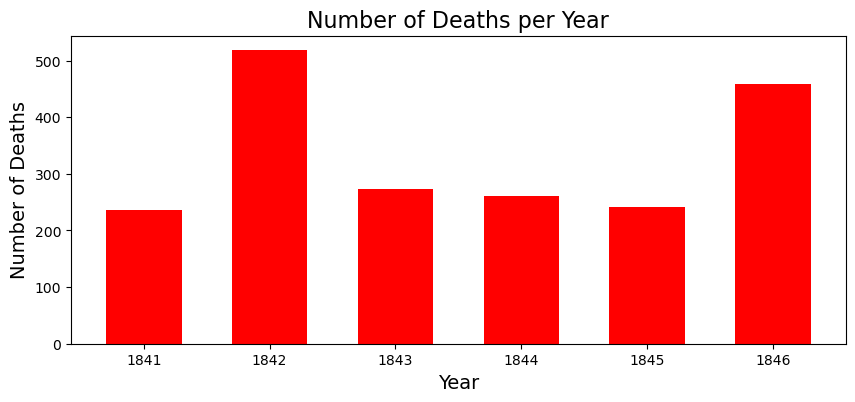

In [29]:
fig,ax = plt.subplots(figsize = (10,4))
plt.bar(df.year, df.deaths, width= 0.6, color= "red")
plt.title("Number of Deaths per Year", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Deaths", fontsize=14)

Text(0, 0.5, 'Number of Deaths')

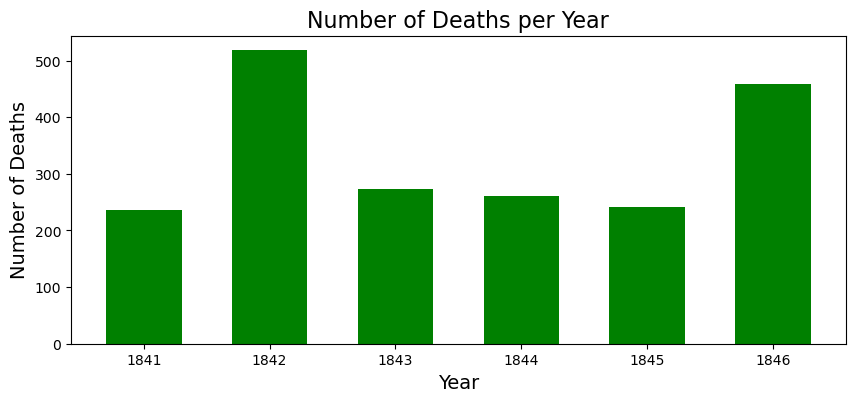

In [30]:
fig,ax = plt.subplots(figsize = (10,4))
plt.bar(df.year, df.deaths, width= 0.6, color= "green")
plt.title("Number of Deaths per Year", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Deaths", fontsize=14)

In [34]:
mon.dtypes
mon['date'] =  pd.to_datetime(mon['date'])

In [35]:
import pandas as pd
start_handwashing = pd.to_datetime('1847-06-01')
before_washing = mon[mon["date"] < start_handwashing]
after_washing = mon[mon["date"] >= start_handwashing]

<Axes: xlabel='date'>

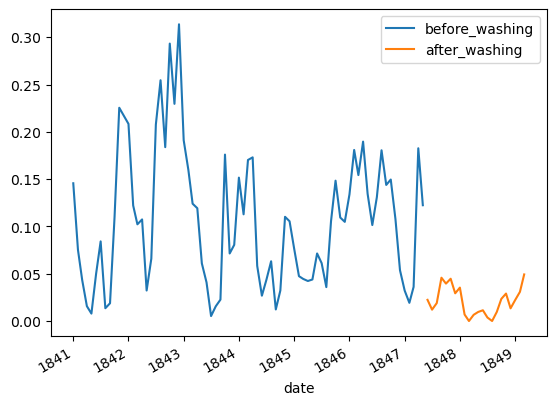

In [36]:
ax=before_washing.plot(x='date',y='prop_death',label='before_washing')
after_washing.plot(x='date',y='prop_death',label='after_washing', ax=ax)

Text(0, 0.5, 'Prop_death')

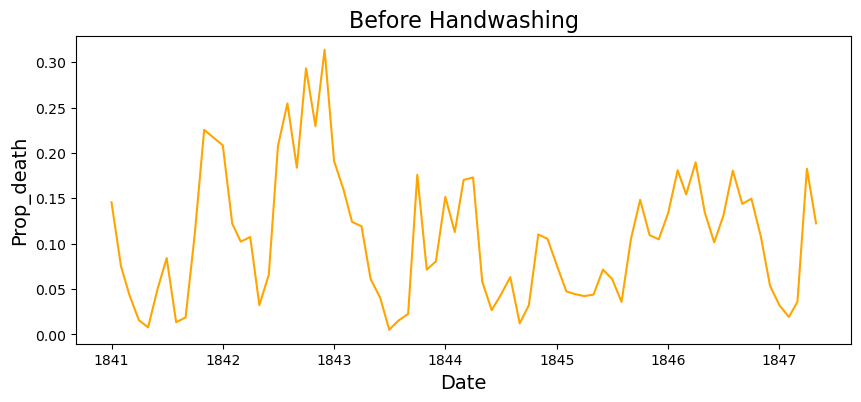

In [39]:
fig,ax = plt.subplots(figsize = (10,4))
x= before_washing["date"]
y= before_washing["prop_death"]
plt.plot(x, y, color= "orange")
plt.title("Before Handwashing", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Prop_death", fontsize=14)

Text(0, 0.5, 'Prop_death')

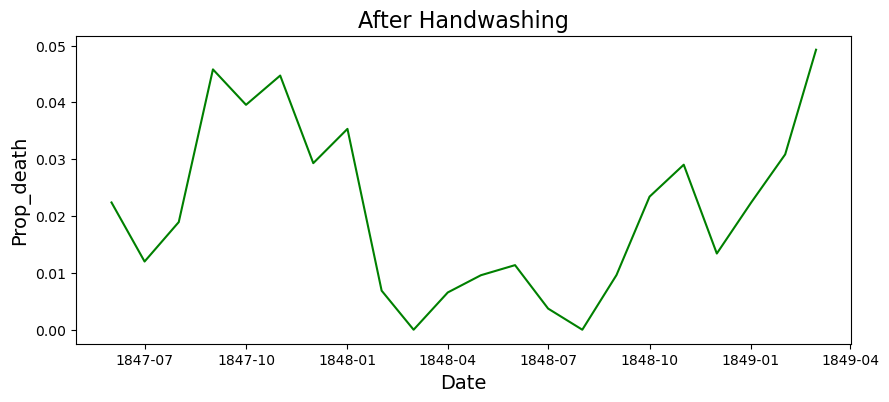

In [40]:
fig,ax = plt.subplots(figsize = (10,4))
x= after_washing["date"]
y= after_washing["prop_death"]
plt.plot(x, y, color= "green")
plt.title("After Handwashing", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Prop_death", fontsize=14)

In [41]:
before_proportion = before_washing["prop_death"]
after_proportion = after_washing["prop_death"]
before_proportion.mean()

0.10504998260908789

In [42]:
after_proportion.mean()

0.021093375097254535

In [43]:
mean_diff = after_proportion.mean() - before_proportion.mean()
mean_diff

-0.08395660751183336